#### You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.shape

(13200, 7)

In [7]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [9]:
lowerbound, upperbound = df['price_per_sqft'].quantile([0.001,0.999])
lowerbound, upperbound

(1366.184, 50959.36200000098)

In [11]:
outliers = df[(df['price_per_sqft']>upperbound) | (df['price_per_sqft']<lowerbound)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1005,other,1 BHK,15.0,1.0,30.0,1,200000
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
9436,Indira Nagar,4 Bedroom,2400.0,5.0,1250.0,4,52083
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000


In [13]:
out2 = df[(df['price_per_sqft']<upperbound) & (df['price_per_sqft']>lowerbound)]
out2.shape

(13172, 7)

In [17]:
df.shape[0] - out2.shape[0]

28

#### Now remove outliers using 4 standard deviation

In [19]:
upperlimit = out2.price_per_sqft.mean() + 4*out2.price_per_sqft.std()
lowerlimit = out2.price_per_sqft.mean() - 4*out2.price_per_sqft.std()
upperlimit, lowerlimit

(23227.73653589429, -9900.429065502549)

In [21]:
out2[(out2.price_per_sqft>upperlimit) | (out2.price_per_sqft<lowerlimit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3420,other,3 Bedroom,1350.0,3.0,380.0,3,28148
6709,Malleshwaram,4 Bedroom,4000.0,4.0,1100.0,4,27500
2618,Malleshwaram,7 Bedroom,3000.0,4.0,900.0,7,30000
10536,other,4 Bedroom,2400.0,4.0,595.0,4,24791
1548,Uttarahalli,5 Bedroom,400.0,5.0,200.0,5,50000
5909,other,5 Bedroom,1240.0,5.0,300.0,5,24193
1721,other,5 Bedroom,2400.0,5.0,625.0,5,26041
8861,Cunningham Road,5 Bedroom,2925.0,5.0,936.0,5,32000
3340,other,19 BHK,2000.0,16.0,490.0,19,24500
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [27]:
out3 = out2[(out2.price_per_sqft<upperlimit) & (out2.price_per_sqft>lowerlimit)]
out3.shape

(13047, 7)

In [29]:
out2.shape[0] - out3.shape[0]

125

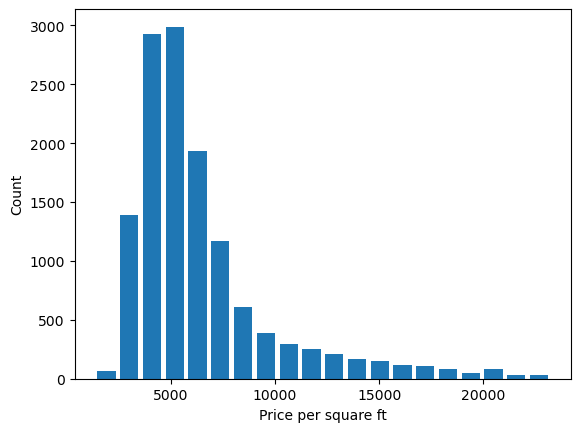

In [33]:
plt.hist(out3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

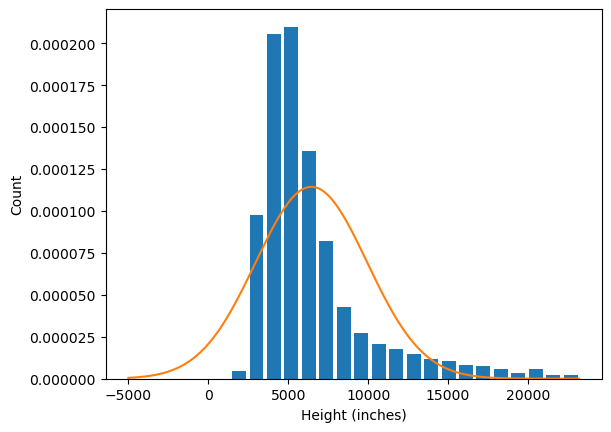

In [39]:
from scipy.stats import norm

plt.hist(out3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, out3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,out3.price_per_sqft.mean(),out3.price_per_sqft.std()))

In [43]:
out2['zscore'] = (out2.price_per_sqft-out2.price_per_sqft.mean())/out2.price_per_sqft.std()
out2.sample(10)

C:\Users\alifa\AppData\Local\Temp\ipykernel_19164\886749265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out2['zscore'] = (out2.price_per_sqft-out2.price_per_sqft.mean())/out2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
11325,other,3 Bedroom,2800.0,3.0,400.00,3,14285,1.840451
445,Raja Rajeshwari Nagar,2 BHK,1295.0,2.0,55.47,2,4283,-0.574895
10168,other,4 BHK,2950.0,4.0,250.00,4,8474,0.437174
8514,Kanakpura Road,3 BHK,1592.0,3.0,125.00,3,7851,0.286728
3754,Kanakpura Road,3 BHK,1591.0,3.0,115.00,3,7228,0.136282
1169,Horamavu Agara,3 BHK,1453.0,2.0,46.48,3,3198,-0.836908
9585,Talaghattapura,3 BHK,1575.0,3.0,80.00,3,5079,-0.382672
5339,Yelahanka,2 BHK,1040.0,2.0,48.86,2,4698,-0.474679
10985,other,3 BHK,1451.0,3.0,68.00,3,4686,-0.477576
4621,Whitefield,2 BHK,1215.0,2.0,62.00,2,5102,-0.377118


In [45]:
outliers_z = out2[(out2.zscore < -4) | (out2.zscore>4)]
outliers_z.shape

(125, 8)

In [47]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
6134,Basavangudi,6 Bedroom,1754.0,6.0,650.0,6,37058,7.339820
8083,other,3 BHK,2750.0,3.0,943.0,3,34290,6.671386
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
2371,other,5 Bedroom,3000.0,6.0,1000.0,5,33333,6.440283


In [49]:
out4 = out2[(out2.zscore>-4)&(out2.zscore<4)]
out4.shape

(13047, 8)

In [51]:
out2.shape[0] - out4.shape[0]

125